Initial dataset shape: (386, 10)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        386 non-null    object
 1   age          386 non-null    object
 2   menopause    386 non-null    object
 3   tumor-size   385 non-null    object
 4   inv-nodes    385 non-null    object
 5   node-caps    386 non-null    object
 6   deg-malig    386 non-null    int64 
 7   breast       386 non-null    object
 8   breast-quad  386 non-null    object
 9   irradiat     386 non-null    object
dtypes: int64(1), object(9)
memory usage: 30.3+ KB
None
Dataset shape after removing duplicates: (375, 10)

Missing values (after replacing '?' and '*'):
class           0
age             0
menopause       0
tumor-size      1
inv-nodes       1
node-caps      12
deg-malig       0
breast          0
breast-quad     6
irradiat        0
dtype: int64
F

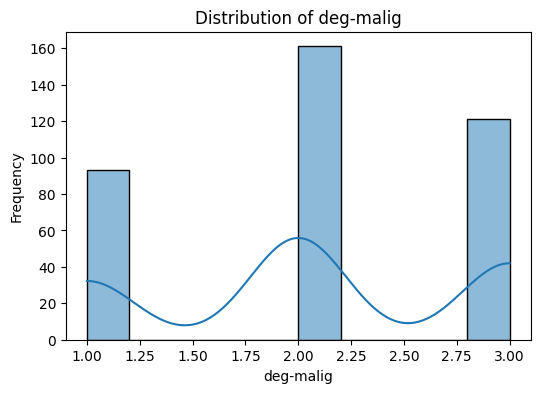

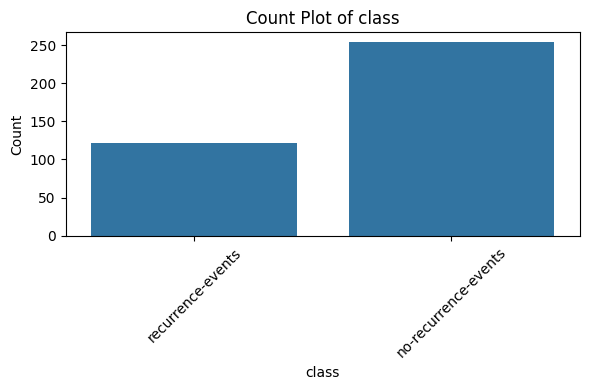

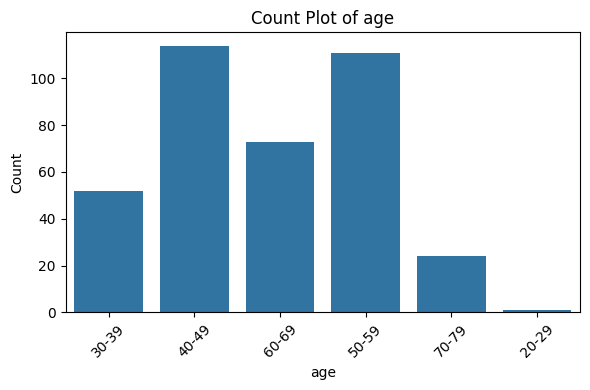

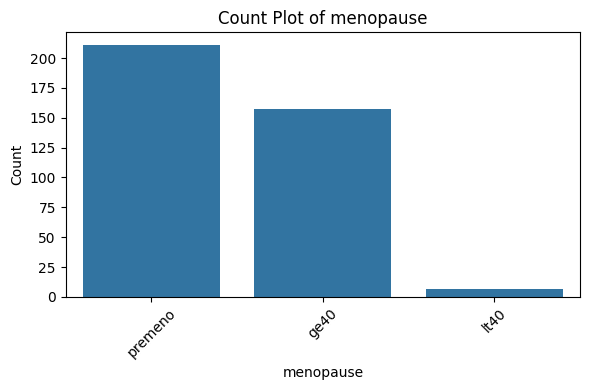

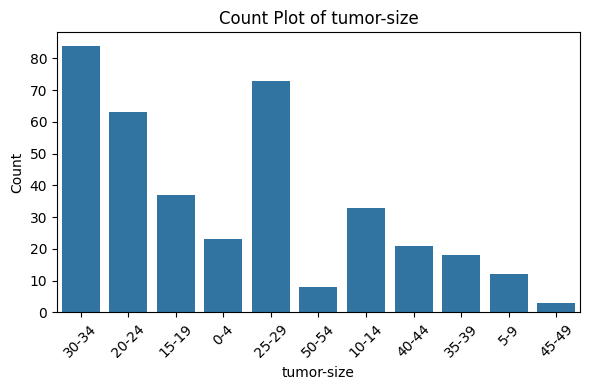

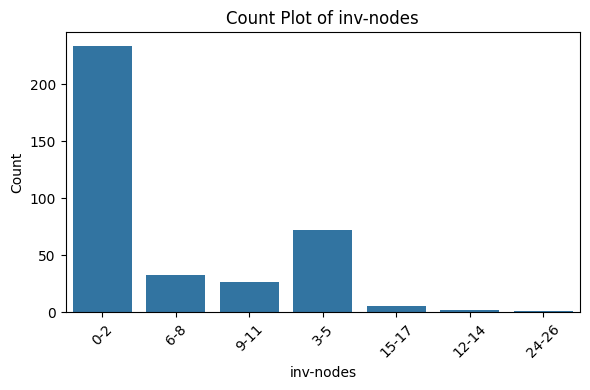

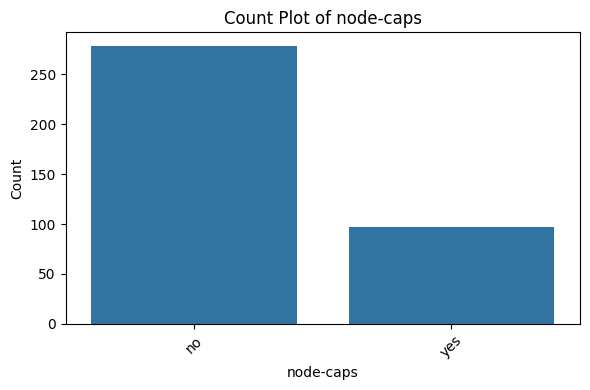

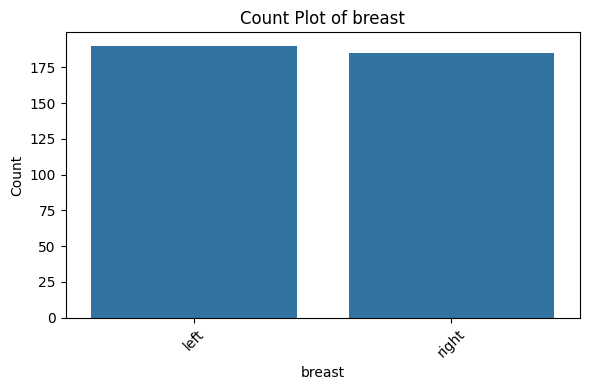

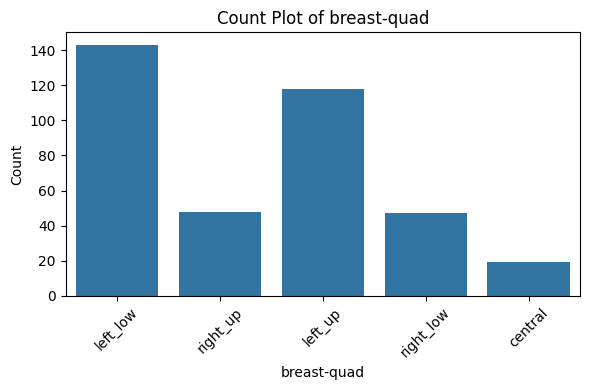

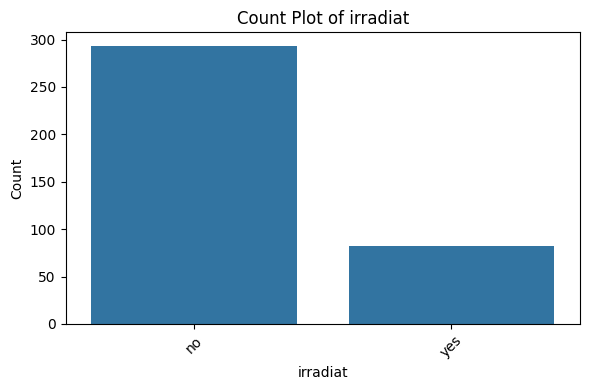


Encoded dataset shape: (375, 32)

Training set shape: (300, 31)
Test set shape: (75, 31)

Basic KNN Classification Report:
                      precision    recall  f1-score   support

no-recurrence-events       0.66      0.84      0.74        51
   recurrence-events       0.20      0.08      0.12        24

            accuracy                           0.60        75
           macro avg       0.43      0.46      0.43        75
        weighted avg       0.51      0.60      0.54        75


Optimized KNN (Grid Search) Classification Report:
                      precision    recall  f1-score   support

no-recurrence-events       0.66      0.84      0.74        51
   recurrence-events       0.20      0.08      0.12        24

            accuracy                           0.60        75
           macro avg       0.43      0.46      0.43        75
        weighted avg       0.51      0.60      0.54        75


Logistic Regression Classification Report:
                      precisio

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# load the dataset and check its shape
df = pd.read_csv("project1.csv")
print("Initial dataset shape:", df.shape)

# inspect data types and remove duplicates
print("\nDataset Information:")
print(df.info())

# remove duplicate rows
if df.duplicated().sum() > 0:
    df = df.drop_duplicates()
    print("Dataset shape after removing duplicates:", df.shape)

# replace invalid placeholders and handle missing values
# replace '?' and '*' with np.nan and impute using mode for categorical and median for numeric.
df.replace({"?": np.nan, "*": np.nan}, inplace=True)
print("\nMissing values (after replacing '?' and '*'):")
print(df.isnull().sum())

# convert 'deg-malig' to numeric 
df['deg-malig'] = pd.to_numeric(df['deg-malig'], errors='coerce')

# list of all categorical columns 
categorical_cols = ['class', 'age', 'menopause', 'tumor-size', 'inv-nodes',
                    'node-caps', 'breast', 'breast-quad', 'irradiat']

# impute missing values in categorical columns with their mode
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)
        print(f"Filled missing values in '{col}' with mode: {mode_val}")

# impute missing numeric values in 'deg-malig' with the median
if df['deg-malig'].isnull().sum() > 0:
    median_val = df['deg-malig'].median()
    df['deg-malig'] = df['deg-malig'].fillna(median_val)
    print("Filled missing values in 'deg-malig' with median:", median_val)

# univariate analysis and visualization 
# plotting the distribution for the numeric variable 'deg-malig'
plt.figure(figsize=(6, 4))
sns.histplot(df['deg-malig'], kde=True, bins=10)
plt.title("Distribution of deg-malig")
plt.xlabel("deg-malig")
plt.ylabel("Frequency")
plt.show()

# plot count plots for each categorical variable
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f"Count Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# one-Hot Encode the categorical features (except the target 'class')
cols_to_encode = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
                  'breast', 'breast-quad', 'irradiat']
df_encoded = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)
print("\nEncoded dataset shape:", df_encoded.shape)

# split the data into training and test sets using stratification
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)
print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# build and evaluate classification models

# basic K-Nearest Neighbors (KNN) Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("\nBasic KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# KNN with GridSearchCV 
param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_
y_pred_best_knn = best_knn.predict(X_test)
print("\nOptimized KNN (Grid Search) Classification Report:")
print(classification_report(y_test, y_pred_best_knn))

# logistic Regression 
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
